# FK exploration

In [1]:
import xarray as xr
from xrsignal import xrsignal
import os
from dask.distributed import Client
import numpy as np
from scipy import signal
import dask
import scipy
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 32,Total memory: 62.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46599,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 62.80 GiB
Comm: tcp://127.0.0.1:42671,Total threads: 4
Dashboard: http://127.0.0.1:36547/status,Memory: 7.85 GiB
Nanny: tcp://127.0.0.1:41173,


## Look at fk filter

In [3]:
# open zarr store
storage_options = {'account_name':'dasdata'}
ds = xr.open_zarr('abfs://zarr/ooi_South_Tx.zarr/ooi_South_Tx.zarr', storage_options=storage_options)

In [57]:
da = ds['RawData'][11000:11500,:500]

In [58]:
daf = scipy.fft.fft2(da.values)

Text(0, 0.5, 'wavenumber [1/m]')

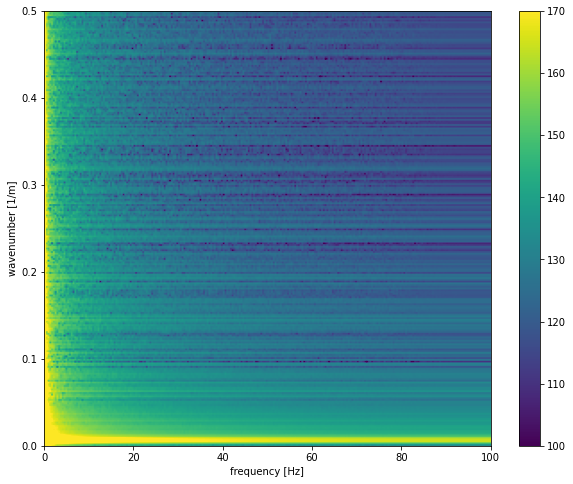

In [60]:
fig = plt.figure(figsize=(10,8))
plt.imshow(20*np.log10(np.abs(daf))[:250,:250], aspect='auto', extent=(0,100, 1/2, 0), vmin=100, vmax=170)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('frequency [Hz]')
plt.ylabel('wavenumber [1/m]')